In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import rnn
from keras.layers import SimpleRNN
from keras.layers import GRU
import tensorflow as tf
import seaborn as sns

%matplotlib inline

2023-05-17 03:53:04.121443: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 03:53:04.343530: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-17 03:53:05.046044: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/rugewit/anaconda3/envs/tf2/lib/
2023-05-17 03:53:05.046160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plug

Загрузка датасета

In [2]:
df = pd.read_csv('pubs_cut.csv', parse_dates=[0])

Описание

In [3]:
df.head()

,Year,Pubs
0,1936-01-01,12
1,1937-01-01,15
2,1938-01-01,11
3,1939-01-01,18
4,1940-01-01,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    84 non-null     datetime64[ns]
 1   Pubs    84 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


In [5]:
df['Year'] = pd.to_datetime(df['Year'])
df = df.set_index('Year')
df.head()

,Pubs
Year,
1936-01-01,12
1937-01-01,15
1938-01-01,11
1939-01-01,18
1940-01-01,10


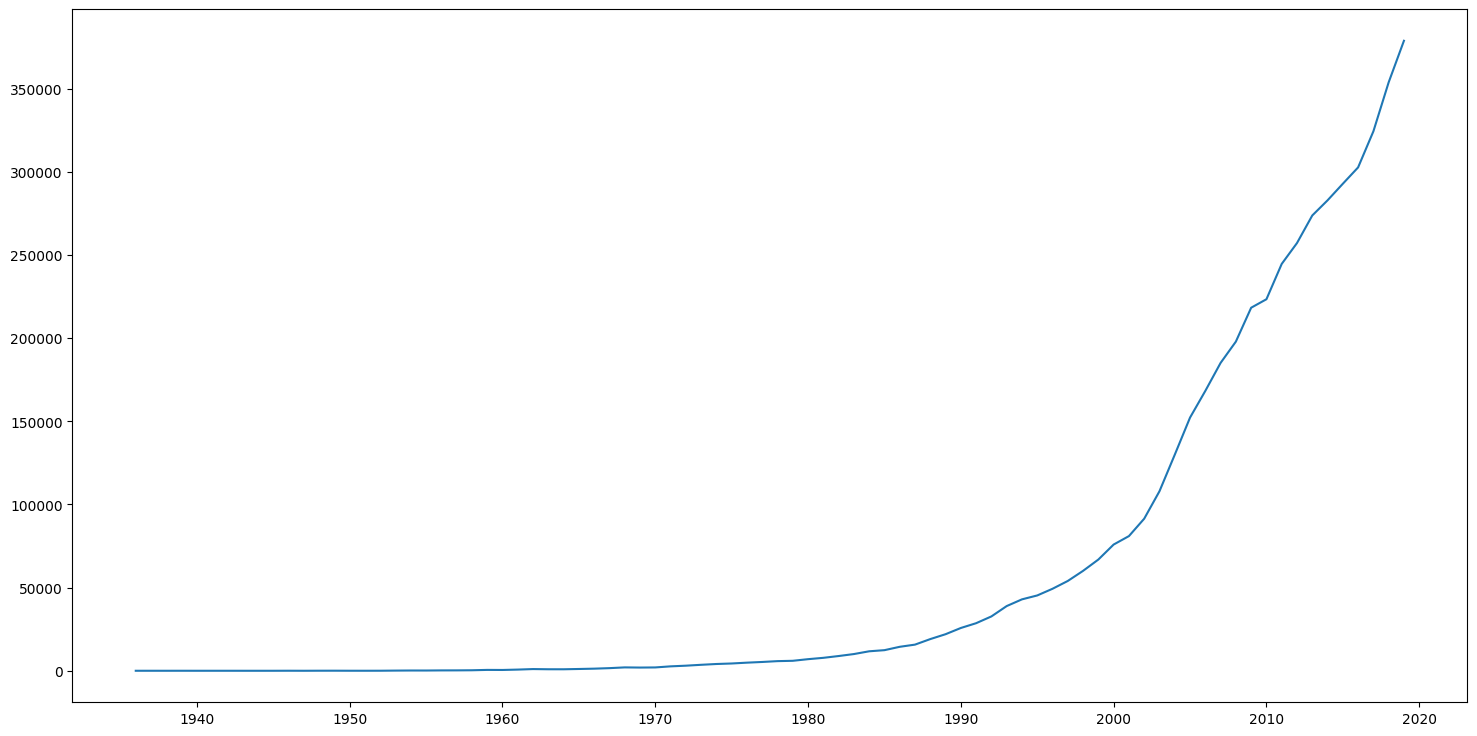

In [6]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Pubs"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

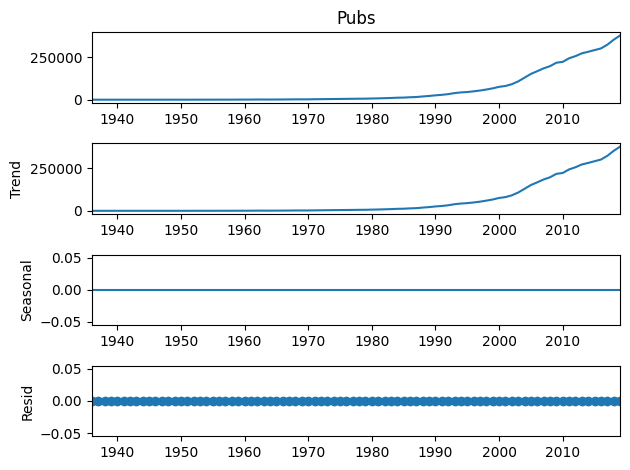

In [7]:
a = seasonal_decompose(df["Pubs"], model = "add", period=1)
a.plot();

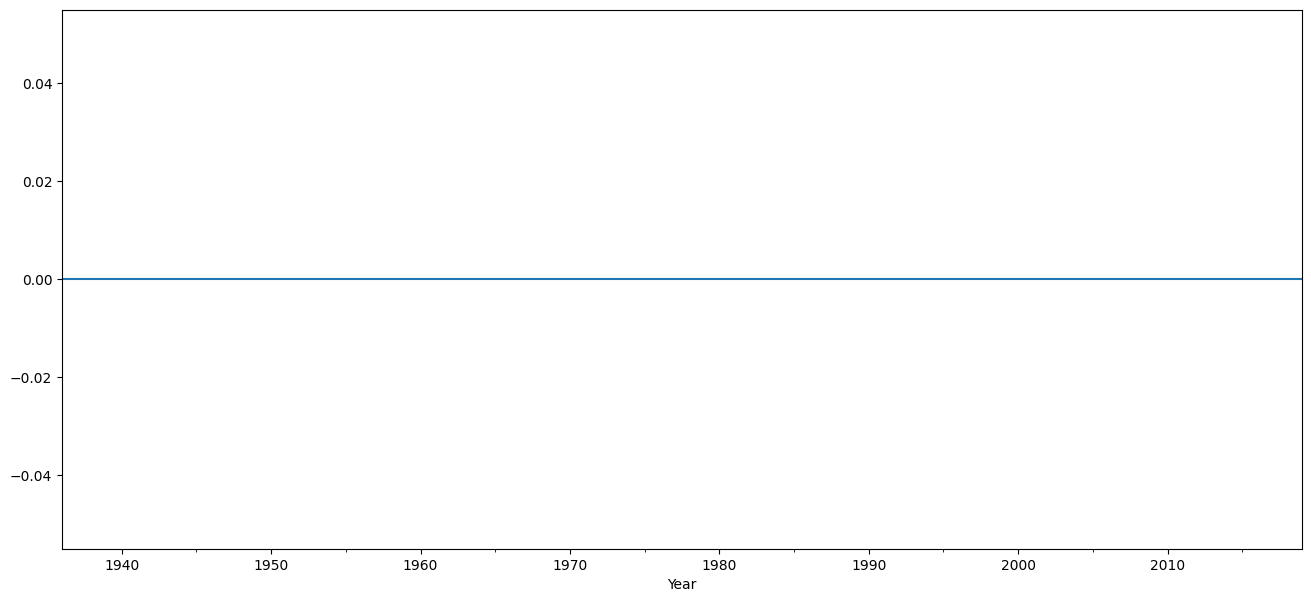

In [8]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

p-value

In [9]:
adf_test = adfuller(df["Pubs"])
print('p-value = ' + str(adf_test[1]))

if adf_test[1] > 0.05:
    print('it is not a stationary process')
else:
    print('it is a stationary process')

p-value = 1.0
it is not a stationary process


ARIMA

In [10]:
train_data = df[:len(df)-8]
print(train_data)
test_data = df[len(df)-8:]

              Pubs
Year              
1936-01-01      12
1937-01-01      15
1938-01-01      11
1939-01-01      18
1940-01-01      10
...            ...
2007-01-01  185093
2008-01-01  197889
2009-01-01  218282
2010-01-01  223376
2011-01-01  244599

[76 rows x 1 columns]


In [11]:
arima_model = SARIMAX(train_data['Pubs'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07291D+01    |proj g|=  2.98707D+00


 This problem is unconstrained.



At iterate    5    f=  9.10109D+00    |proj g|=  5.26213D-02

At iterate   10    f=  9.07988D+00    |proj g|=  8.13010D-03

At iterate   15    f=  9.07901D+00    |proj g|=  6.94245D-04

At iterate   20    f=  9.07893D+00    |proj g|=  3.98144D-03

At iterate   25    f=  9.07877D+00    |proj g|=  9.59909D-05

At iterate   30    f=  9.07877D+00    |proj g|=  1.99215D-04

At iterate   35    f=  9.07877D+00    |proj g|=  6.56922D-05

At iterate   40    f=  9.07876D+00    |proj g|=  1.17824D-03

At iterate   45    f=  9.07874D+00    |proj g|=  1.00875D-03

At iterate   50    f=  9.07873D+00    |proj g|=  1.98800D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                       Pubs   No. Observations:                   76
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood                -689.983
Date:                                    Wed, 17 May 2023   AIC                           1401.967
Time:                                            03:53:10   BIC                           1427.459
Sample:                                        01-01-1936   HQIC                          1412.146
                                             - 01-01-2011                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0169      0.135      0.125      0.900      -0.248       0.282
ar.L2          0.9570      0.172      5.555      0.000       0.619       1.295
ma.L1          0.3962      0.212      1.873      0.061      -0.018       0.811
ar.S.L12       0.1634   3995.627   4.09e-05      1.000   -7831.121    7831.448
ar.S.L24       0.4707    683.208      0.001      0.999   -1338.592    1339.534
ar.S.L36      -0.1309    614.380     -0.000      1.000   -1204.293    1204.031
ar.S.L48       0.0382    303.888      0.000      1.000    -595.571     595.647
ma.S.L12       0.1236   3996.277   3.09e-05      1.000   -7832.435    7832.682
ma.S.L24      -0.5670    584.453     -0.001      0.999   -1146.074    1144.940
ma.S.L36      -0.0357    986.816  -3.62e-05      1.000   -1934.160    1934.088
sigma2      5.982e+06      2.506   2.39e+06      0.000    5.98e+06    5.98e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               256.57
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):            3688.63   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+23. Standard errors may be unstable.
"""

In [12]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred.index = test_data.index
arima_pred

Year
2012-01-01    252498.343712
2013-01-01    272271.970727
2014-01-01    280596.944841
2015-01-01    302943.977462
2016-01-01    314570.317415
2017-01-01    337502.452123
2018-01-01    347490.117592
2019-01-01    368685.420773
Name: ARIMA Predictions, dtype: float64

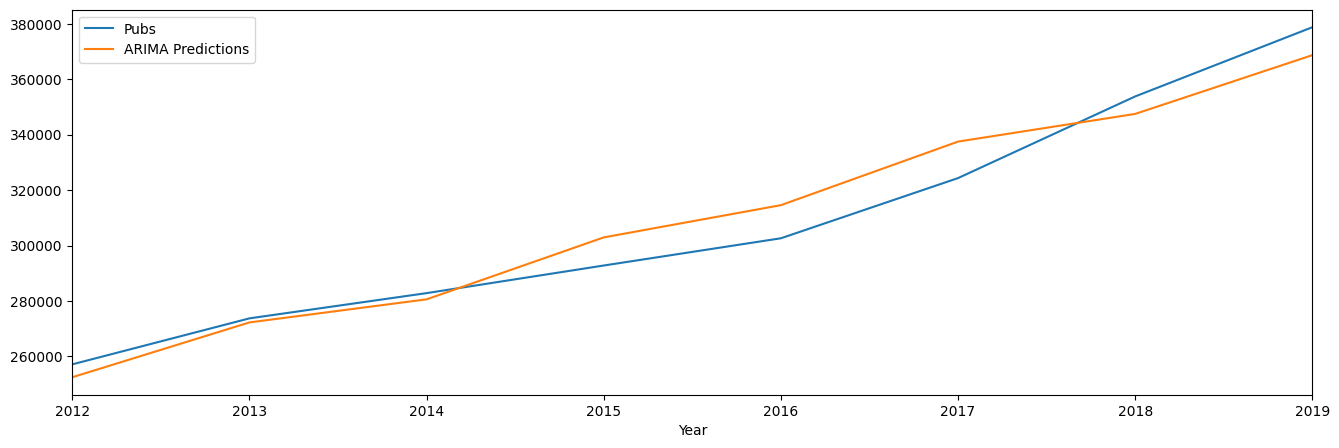

In [13]:
test_data['Pubs'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [14]:
arima_rmse_error = rmse(test_data['Pubs'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae_error = mean_absolute_error(test_data['Pubs'], arima_pred)
mean_value = df['Pubs'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 73624050.72586477
RMSE Error: 8580.445834912354
Mean: 59181.607142857145


In [15]:
global_test_data = test_data.copy()
global_test_data['ARIMA_Predictions'] = arima_pred

rnn

In [16]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [17]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [18]:
#rnn_model = Sequential()
#rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
#rnn_model.add(Dense(1))

rnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(n_input, n_features)),
    tf.keras.layers.SimpleRNN(80),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 80)                6560      
                                                                 
 dense (Dense)               (None, 80)                6480      
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
_________________________________________________________________


2023-05-17 03:53:11.161998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 03:53:11.194919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 03:53:11.195176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 03:53:11.195847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [19]:
rnn_model.fit_generator(generator, epochs = 5)

Epoch 1/5
64/64 [==============================] - 1s 8ms/step - loss: 0.0132
Epoch 2/5
64/64 [==============================] - 1s 8ms/step - loss: 0.0015
Epoch 3/5
64/64 [==============================] - 1s 8ms/step - loss: 4.7246e-04
Epoch 4/5
64/64 [==============================] - 1s 8ms/step - loss: 3.8343e-04
Epoch 5/5
64/64 [==============================] - 1s 8ms/step - loss: 8.7446e-04


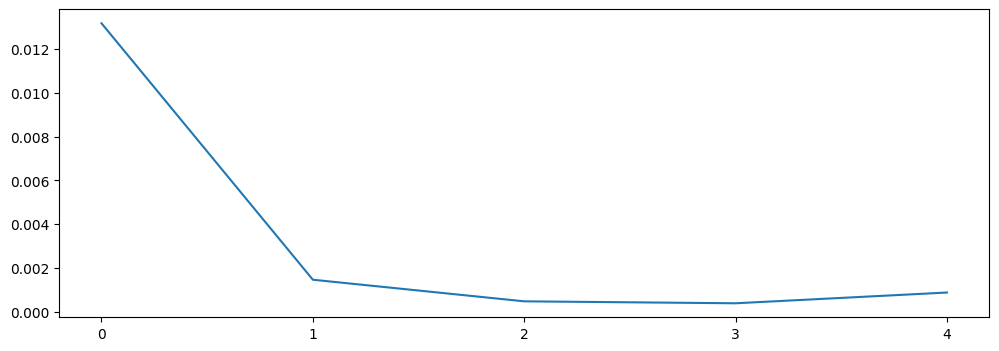

In [20]:
losses_rnn = rnn_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_rnn)),losses_rnn);

In [21]:
RNN_Predictions_scaled = list()

# last n_input elements
batch = scaled_train_data[-n_input:]
print('batch')
print(batch)
print('shape is ', batch.shape)
# shape now is (1, 12, 1)
current_batch = batch.reshape((1, n_input, n_features))
print('current batch')
print(current_batch)
print('shape is ', current_batch.shape)
for i in range(len(test_data)):   
    rnn_pred = rnn_model.predict(current_batch)[0]
    RNN_Predictions_scaled.append(rnn_pred) 
    # first element in current_batch will be gone
    # a new element will be inserted at the end
    current_batch = np.append(current_batch[:,1:,:],[[rnn_pred]],axis=1)
    print('current_batch now\n', current_batch)
    print('current_batch shape\n', current_batch.shape)

batch
[[0.31024882]
 [0.33103837]
 [0.37381538]
 [0.44129047]
 [0.53095742]
 [0.62239875]
 [0.68791548]
 [0.75671521]
 [0.80903047]
 [0.89240537]
 [0.91323172]
 [1.        ]]
shape is  (12, 1)
current batch
[[[0.31024882]
  [0.33103837]
  [0.37381538]
  [0.44129047]
  [0.53095742]
  [0.62239875]
  [0.68791548]
  [0.75671521]
  [0.80903047]
  [0.89240537]
  [0.91323172]
  [1.        ]]]
shape is  (1, 12, 1)
1/1 [==============================] - 0s 147ms/step
current_batch now
 [[[0.33103837]
  [0.37381538]
  [0.44129047]
  [0.53095742]
  [0.62239875]
  [0.68791548]
  [0.75671521]
  [0.80903047]
  [0.89240537]
  [0.91323172]
  [1.        ]
  [1.08208942]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 25ms/step
current_batch now
 [[[0.37381538]
  [0.44129047]
  [0.53095742]
  [0.62239875]
  [0.68791548]
  [0.75671521]
  [0.80903047]
  [0.89240537]
  [0.91323172]
  [1.        ]
  [1.08208942]
  [1.13948333]]]
current_batch shape
 (1, 12, 1)
1/1 [==============

In [22]:
RNN_Predictions_scaled

[array([1.0820894], dtype=float32),
 array([1.1394833], dtype=float32),
 array([1.1905344], dtype=float32),
 array([1.2450409], dtype=float32),
 array([1.2885273], dtype=float32),
 array([1.3202078], dtype=float32),
 array([1.3464744], dtype=float32),
 array([1.3629993], dtype=float32)]

In [23]:
RNN_Predictions = scaler.inverse_transform(RNN_Predictions_scaled)

In [24]:
global_test_data['RNN_Predictions'] = RNN_Predictions

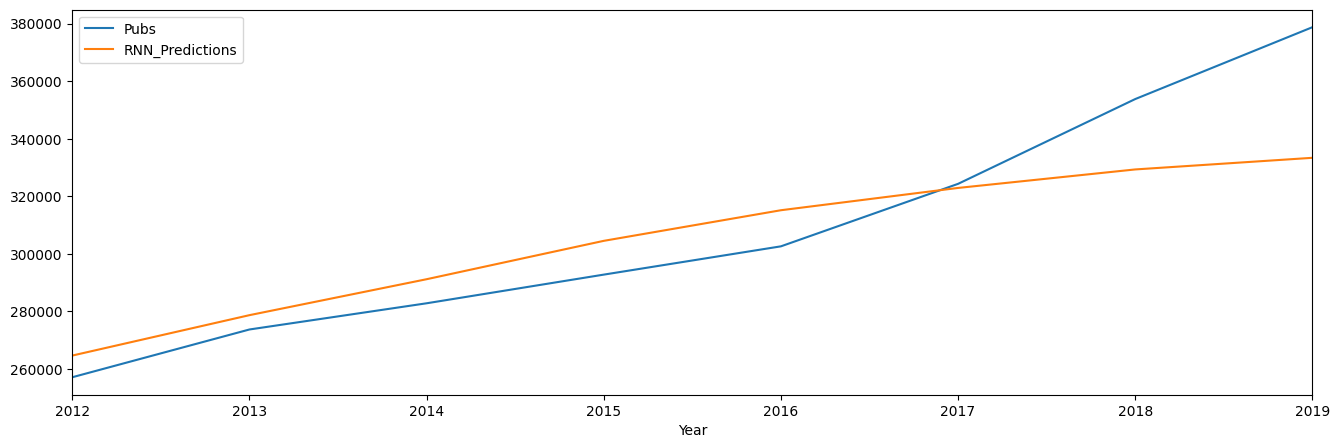

In [25]:
global_test_data['Pubs'].plot(figsize = (16,5), legend=True)
global_test_data['RNN_Predictions'].plot(legend = True);

In [26]:
rnn_rmse_error = rmse(global_test_data['Pubs'], global_test_data["RNN_Predictions"])
rnn_mse_error = rnn_rmse_error**2
rnn_mae_error = mean_absolute_error(global_test_data['Pubs'], global_test_data["RNN_Predictions"])
mean_value = df['Pubs'].mean()

print(f'MSE Error: {rnn_mse_error}\nRMSE Error: {rnn_rmse_error}\nMean: {mean_value}')

MSE Error: 388177708.0924531
RMSE Error: 19702.225967957354
Mean: 59181.607142857145


In [27]:
rmse_errors = [arima_rmse_error, rnn_rmse_error]
mse_errors = [arima_mse_error, rnn_mse_error]
mae_errors = [arima_mae_error, rnn_mae_error]

In [28]:
errors = pd.DataFrame({"Models" : ["ARIMA", "RNN"],"RMSE Error" : rmse_errors, "MSE Error" : mse_errors,"MAE Error": mae_errors})

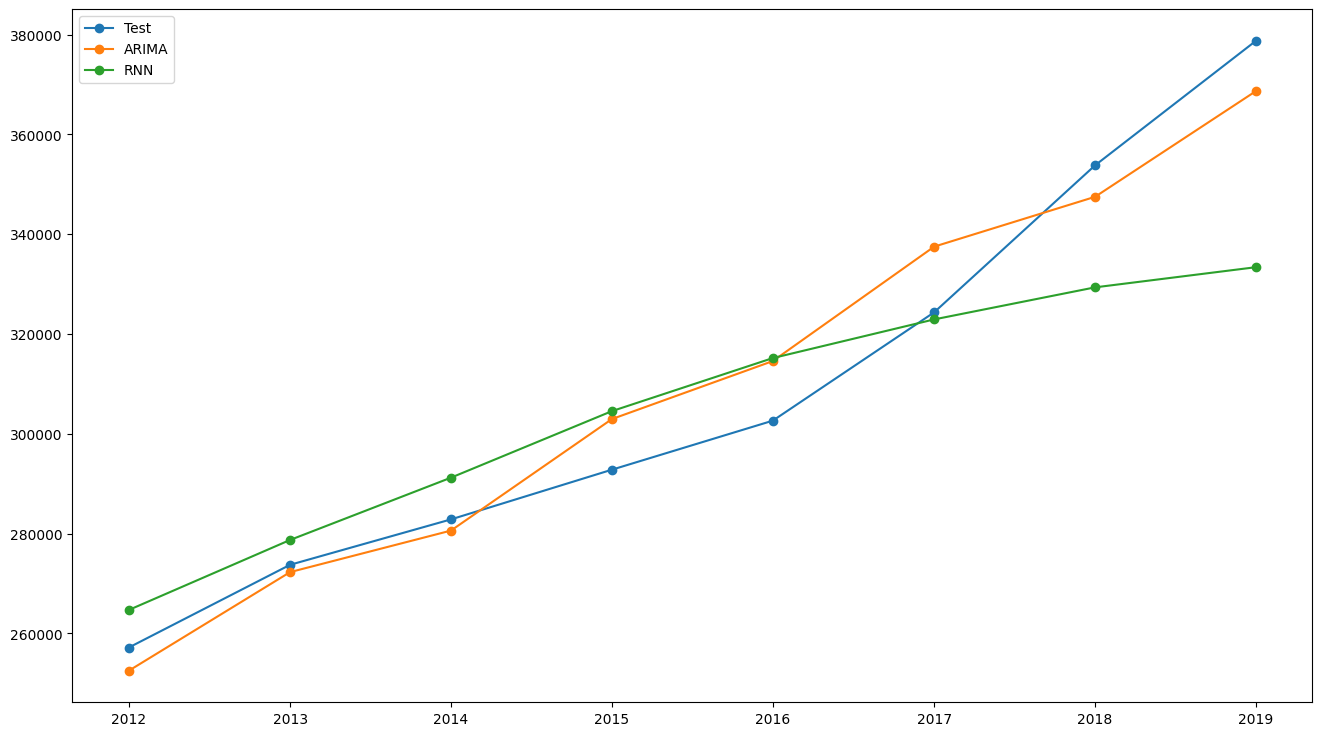

In [29]:
plt.figure(figsize=(16,9))
plt.plot_date(global_test_data.index, global_test_data["Pubs"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["ARIMA_Predictions"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["RNN_Predictions"], linestyle="-")
plt.legend(["Test", "ARIMA", 'RNN'], loc ="upper left")
plt.show()

In [30]:
print(f"Mean: {global_test_data['Pubs'].mean()}")
errors

Mean: 308255.875


,Models,RMSE Error,MSE Error,MAE Error
0,ARIMA,8580.445835,7.362405e+07,7499.368669
1,RNN,19702.225968,3.881777e+08,14549.945091


In [31]:
global_test_data

,Pubs,ARIMA_Predictions,RNN_Predictions
Year,,,
2012-01-01,257147,252498.343712,264677.580606
2013-01-01,273738,272271.970727,278715.786262
2014-01-01,282840,280596.944841,291202.559600
2015-01-01,292799,302943.977462,304534.532318
2016-01-01,302625,314570.317415,315171.034257
2017-01-01,324339,337502.452123,322919.915009
2018-01-01,353797,347490.117592,329344.561620
2019-01-01,378762,368685.420773,333386.455683
